In [1]:
import pandas as pd
import os
import openai

# Replace 'YOUR_API_KEY' with your actual OpenAI API key
api_key = os.environ['OPENAI_API_KEY']

# Initialize the OpenAI API client
openai.api_key = api_key

def generate_text(prompt, temperature=0.1):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",  # You can choose an appropriate engine
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature
        )
        return response.choices[0].message.content
    except Exception as e:
        return str(e)

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')


In [4]:
df.to_clipboard()

In [5]:
df.shape

(891, 12)

In [6]:
agg_df = pd.DataFrame(df.groupby('Survived').Age.mean()).rename(columns = {'Age':'Average Age'}).reset_index()

agg_df

,Survived,Average Age
0,0,30.626179
1,1,28.343690


In [7]:
# Example usage:
prompt = f"""Create a bar chart that shows average Age by Survived,{agg_df}
"""

In [8]:
prompt

'Create a bar chart that shows average Age by Survived,   Survived  Average Age\n0         0    30.626179\n1         1    28.343690\n'

In [9]:
generated_text = generate_text(prompt)
print(generated_text)


Here is a bar chart that shows the average age by survived status:

```
import matplotlib.pyplot as plt

# Data
survived = [0, 1]
average_age = [30.626179, 28.343690]

# Bar chart
plt.bar(survived, average_age, color='blue')

# Title and labels
plt.title('Average Age by Survived')
plt.xlabel('Survived')
plt.ylabel('Average Age')

# X-axis tick labels
plt.xticks(survived, ['Not Survived', 'Survived'])

# Display the chart
plt.show()
```

This bar chart will have two bars, one for "Not Survived" and one for "Survived". The height of each bar represents the average age for that category. The x-axis represents the survived status, and the y-axis represents the average age.


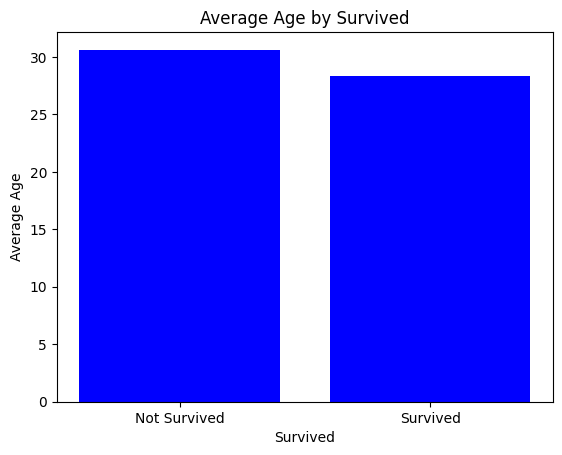

In [10]:
import matplotlib.pyplot as plt

# Data
survived = [0, 1]
average_age = [30.626179, 28.343690]

# Bar chart
plt.bar(survived, average_age, color='blue')

# Title and labels
plt.title('Average Age by Survived')
plt.xlabel('Survived')
plt.ylabel('Average Age')

# X-axis tick labels
plt.xticks(survived, ['Not Survived', 'Survived'])

# Display the chart
plt.show()

In [11]:
# Generate a list of departments
departments = ['HR', 'Finance', 'Marketing', 'Sales', 'Engineering']

# Create an empty list to store data
data = []

# Generate dummy data
for _ in range(100):
    month = random.choice(['January', 'February', 'March'])
    department = random.choice(departments)
    employee_name = f'Employee{_ + 1}'
    spending_amount = round(random.uniform(1000, 5000), 2)
    
    # Check for duplicate employee names in different departments
    while any((d['Employee Name'] == employee_name) and (d['Department'] != department) for d in data):
        employee_name = f'Employee{_ + 1}'
    
    data.append({
        'Month': month,
        'Department': department,
        'Employee Name': employee_name,
        'Spending Amount': spending_amount
    })

# Create a DataFrame
df = pd.DataFrame(data)

In [12]:
df

,Month,Department,Employee Name,Spending Amount
0,January,Sales,Employee1,3418.18
1,January,Finance,Employee2,4846.34
2,January,Sales,Employee3,1755.83
3,March,HR,Employee4,4393.49
4,March,Engineering,Employee5,2167.54
...,...,...,...,...
95,March,Marketing,Employee96,2071.19
96,February,Sales,Employee97,3184.73
97,January,Engineering,Employee98,2743.03
98,March,Engineering,Employee99,1575.70


In [13]:
def sample_df_with_fully_unique_row_across_all_columns(df):
    # Initialize an empty DataFrame to store the sampled rows
    sampled_df = pd.DataFrame(columns=df.columns)
    
    # Initialize a set to keep track of sampled rows as tuples
    sampled_rows = set()
    
    # Loop through the rows and add them to the sampled_df while checking for uniqueness
    for index, row in df.iterrows():
        row_tuple = tuple(row)
        if row_tuple not in sampled_rows:
            sampled_df = pd.concat([sampled_df, row.to_frame().T])
            sampled_rows.add(row_tuple)
    
        # Check if you have enough unique rows; you can adjust the number as needed
        if len(sampled_df) >= 5:
            break
    
    return sampled_df

In [14]:
sampled_data = sample_df_with_fully_unique_row_across_all_columns(df)

In [16]:
sampled_data

,Month,Department,Employee Name,Spending Amount
0,January,Sales,Employee1,3418.18
1,January,Finance,Employee2,4846.34
2,January,Sales,Employee3,1755.83
3,March,HR,Employee4,4393.49
4,March,Engineering,Employee5,2167.54


In [17]:
user_query = 'create a bar chart that shows average spending amount by department for the month of January'

In [18]:
prompt = f"""Generate code for this request "Create an appropriate visual to show {user_query}"

Sample Data:
{sampled_data}  # Define or replace sampled_data with your actual data

Instructions for Code Generation:
1. Write code to filter the data for the specified column and values when necessary.
2. Assume data is just called "df". Don't create any dummy data on your own
3. Just give me the code as output"""

In [19]:
generated_ai_text = generate_text(prompt)

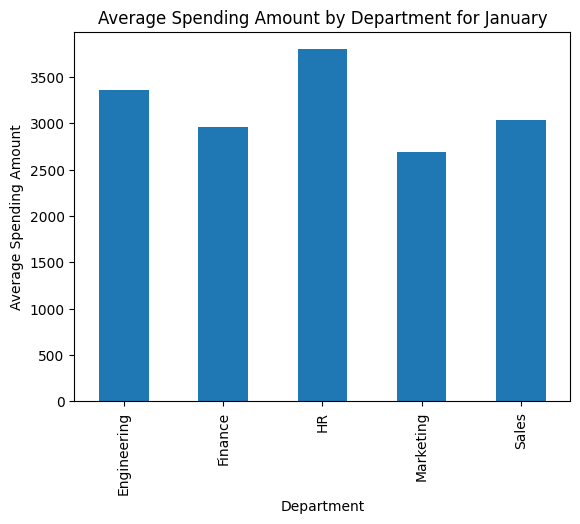

In [24]:
exec(generated_ai_text)

In [21]:
print(generated_ai_text)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is stored in a DataFrame called "df"

# Filter the data for the month of January
january_data = df[df['Month'] == 'January']

# Group the data by department and calculate the average spending amount
average_spending_by_department = january_data.groupby('Department')['Spending Amount'].mean()

# Create a bar chart to visualize the average spending amount by department
average_spending_by_department.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Spending Amount')
plt.title('Average Spending Amount by Department for January')
plt.show()


In [31]:
def process_doc_files(SUPPORT_DOC_FOLDER_PATH) -> dict:
    """
    Process text files in a folder and return a dictionary with file names as keys and content as values.

    :param folder_path: The path to the folder containing the text files.
    :return: A dictionary with file names as keys and content as values.
    """
    # Initialize an empty dictionary to store the results
    doc_dict = {}

    # Check if the folder exists
    if not os.path.exists(SUPPORT_DOC_FOLDER_PATH):
        return doc_dict  # Return an empty dictionary if the folder does not exist

    # List all files in the folder
    file_list = os.listdir(SUPPORT_DOC_FOLDER_PATH)

    # Iterate through the files
    for filename in file_list:
        # Check if the file has a .txt extension
        if filename.endswith(".txt"):
            # Create the full path to the file
            file_path = os.path.join(SUPPORT_DOC_FOLDER_PATH, filename)

            # Open the file and read its content
            with open(file_path, 'r', encoding='utf-8') as file:
                file_content = file.read()

            # Store the content in the dictionary with the filename as the key
            doc_dict[filename] = file_content

    return doc_dict


# Define the function to extract the "document_objects" object
def extract_document_objects(all_file_mapping):

    document_objects = []

    for title, doc in all_file_mapping.items():
        
        document_object = Document(page_content= doc)
        document_objects.append(document_object)    

    return document_objects

In [33]:
SUPPORT_DOC_FOLDER_PATH = 'support_docs'
all_docs = process_doc_files(SUPPORT_DOC_FOLDER_PATH)

In [34]:
extract_document_objects(all_docs)

[Document(page_content='TechLink Communications Mobile App User Guide\n\nOur mobile app makes managing your TechLink Communications account easier than ever. Follow this guide to get started:\n\n1. Download the App:\n   - Visit your device\'s app store and search for "TechLink Communications."\n   - Download and install the app.\n\n2. Account Management:\n   - Log in using your TechLink Communications credentials.\n   - Access account details, billing information, and usage data.\n\n3. Bill Payment:\n   - Make secure payments from your mobile device.\n   - Set up recurring payments for convenience.\n\n4. Troubleshooting:\n   - Use the app to troubleshoot common issues, such as slow internet or TV problems.\n\nFor more information and FAQs, visit www.techlinkcommunications.com/support/mobile-app.\n\nIf you need assistance or have questions about the app, contact our app support team at appsupport@techlinkcommunications.com or call (123) 456-7890.\n\nManage your TechLink Communications a

In [41]:
num_columns = 3
figures = [1,2,3,4]

for i in range(0, len(figures), num_columns):
    for j in range(num_columns):
        if i+j < len(figures):
            print(j+1, i+j + 1)

1 1
2 2
3 3
1 4


In [ ]:
import pandas as pd
import os
import boto3
from langchain.schema import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from bs4 import BeautifulSoup
from databricks.connect import DatabricksSession as SparkSession
from databricks.sdk.core import Config
import shutil
import re

query = '''select *, FROM_UNIXTIME(try_cast(a.ts as double)) AS datetime_column from hive_metastore.devrel_slack_events.gold_parent_messages_devrel_reaction_added as a

inner join hive_metastore.devrel_slack_events.gold_parent_messages_join_replies as r 

using (id, channel_name, ts, type, user, text, event_ts_final, is_parent_message)

WHERE a.white_check_mark_added_at is not null
AND a.channel_name = "gx-community-support"'''


CLUSTER_ID = os.environ.get("CLUSTER_ID")
    
config = Config(profile = 'default', cluster_id = CLUSTER_ID)
spark = SparkSession.builder.sdkConfig(config).getOrCreate()

df = spark.sql(query)
    

In [ ]:
spark.sql(query)